In [1]:
# feel free to change n and beta0 to see the effect of sample size 
# and parameter values
n = 100
beta0 = c(1.0, 1.0, 0.0) 

The sample size is set to be 100, which is moderate for simple regressions. 

In [3]:
X = cbind(rnorm(n), rpois(n, 3) )
e = rlogis(n)

y = cbind(1, X ) %*% beta0 + e # generate data

Generate data

In [4]:
reg1 = lm( y ~ X ) # OLS regression
summary(reg1)


Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1109 -0.8589  0.0444  0.6865  4.7940 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.67842    0.34215   1.983   0.0502 .  
X1           0.88143    0.17417   5.061 1.98e-06 ***
X2           0.03218    0.09278   0.347   0.7295    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.764 on 97 degrees of freedom
Multiple R-squared:  0.2098,	Adjusted R-squared:  0.1935 
F-statistic: 12.87 on 2 and 97 DF,  p-value: 1.099e-05


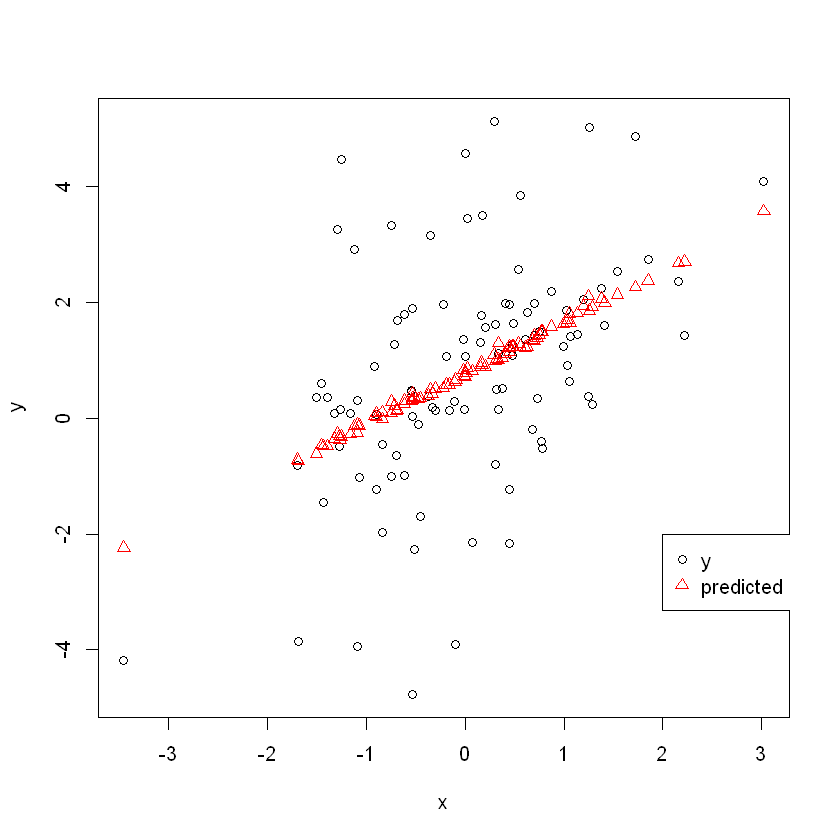

In [5]:
yhat = predict( reg1, data  = X ) # predicted value from the OLS regression
matplot( x = X[,1], y = cbind(y, yhat), pch = 1:2, xlab = "x", ylab = "y")
legend(x = 2, y = -2, pch = 1:2, col = 1:2, legend = c("y", "predicted"))

Change $y$ to be a binary variable

In [6]:
y01 = (y >= 0) 
reg2 = lm( y01 ~ X ) # logistic regression
summary(reg2)


Call:
lm(formula = y01 ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8627 -0.1704  0.1570  0.2757  0.4758 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.78434    0.07991   9.815 3.36e-16 ***
X1           0.14790    0.04068   3.636 0.000446 ***
X2          -0.01145    0.02167  -0.528 0.598407    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.412 on 97 degrees of freedom
Multiple R-squared:  0.122,	Adjusted R-squared:  0.1039 
F-statistic:  6.74 on 2 and 97 DF,  p-value: 0.001816


In [8]:
yhat01 = predict( reg2, data  = X )
reg3 = glm( y01 ~ X, family=binomial(link='logit') )
summary(reg3)


Call:
glm(formula = y01 ~ X, family = binomial(link = "logit"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04858   0.02387   0.53687   0.73734   1.22278  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.43902    0.50218   2.866  0.00416 **
X1           0.92327    0.29078   3.175  0.00150 **
X2          -0.05178    0.13239  -0.391  0.69570   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.467  on 99  degrees of freedom
Residual deviance:  99.399  on 97  degrees of freedom
AIC: 105.4

Number of Fisher Scoring iterations: 4


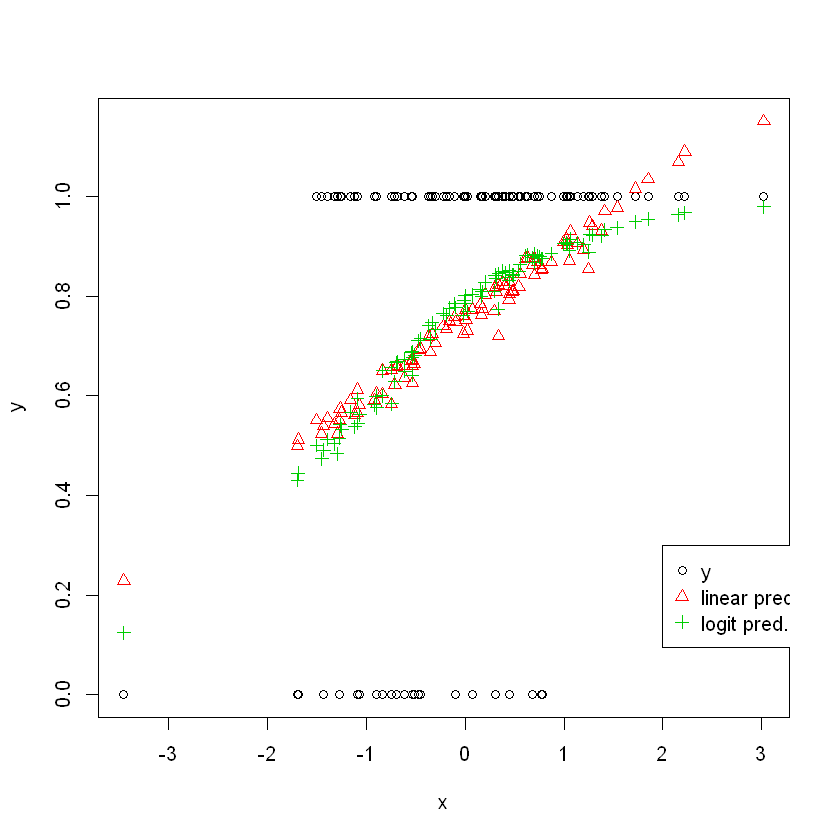

In [9]:
yhat01_logit = predict( reg3, data  = X, type="response" )
matplot( x = X[,1], y = cbind(y01, yhat01, yhat01_logit), pch = 1:3, xlab = "x", ylab = "y" )
legend(x = 2, y = .3, pch = 1:3, col = 1:3, legend = c("y", "linear pred.", "logit pred."))

### Exercise: 

change the sample size to be 10000. Check if the estimated parameter will be very close to the true value. It makes sure that the estimated parameters will be close to the true parameter when the model is correctly specified. In the meantime, the sample size is big enough so that the computer will take a few minutes until the graphs are displayed.

## Heteroskedasticity

Heteroskedasticity can happen even if the observations are iid across $i$. In the following example, $e_i = x_{1i} u_i $ and $x_{1i}$ and $u_i \sim (0, \sigma^2 ) $ are independent. The mean independence 
$$E[e_i|x_i] = x_{1i} E[u_i|x_i] = 0$$ 
is still satisfied, but 
$$E[e_i^2 |x_i] = x_{1i}^2 E[u_i^2 |x_i] = x_{1i}^2 \sigma^2.$$

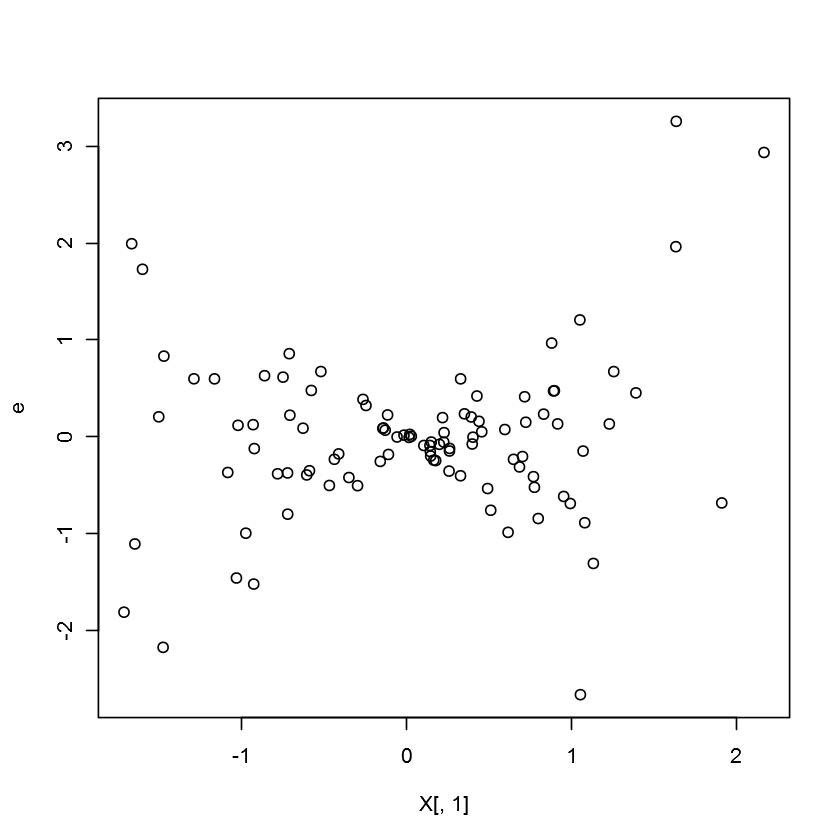

In [7]:
X = cbind(rnorm(n), rpois(n, 3) )
e = X[,1] * rnorm(n)  # the source of heteroskedasticity

y = cbind(1, X ) %*% beta0 + e
plot( y = e, x = X[,1])

The OLS estimator is still consistent and asymptotically normal, but the asymptotic variance is difference from the case of homoskedasticity.